# Basic classification: Classify images of clothing
## Import tensorflow, numpy, and matplotlib

In [5]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.3.1


In [6]:
#Download fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
#Set class names array to map to labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

## Preprocess the data

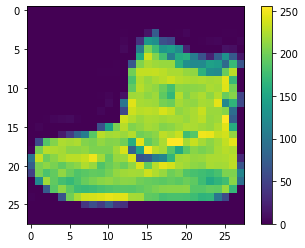

In [13]:
#Plot first train image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
#Scale pixel values (0-255) to range of 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

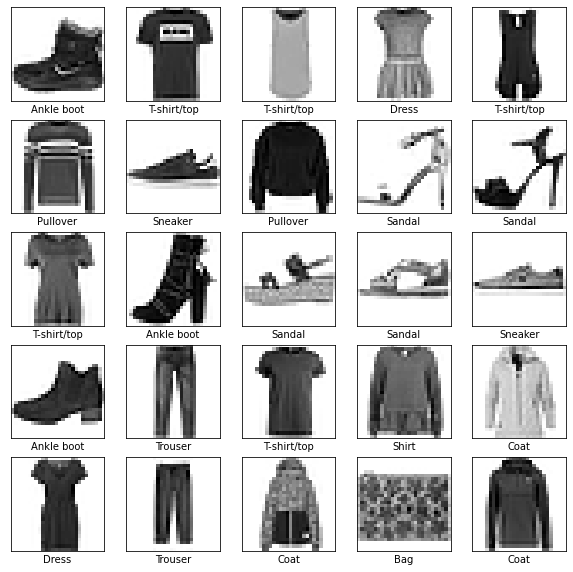

In [16]:
#Plot first 25 training images with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
### Set up the layers

In [19]:
#Flatten transforms the format of images from 2d array of 28x28 pixels to 1d array of 28*28=784 pixels
#Only reformats data -- no processing
#Dense layers are densely, or fully connected, neural layers
#First Dense layer has 128 nodes
#Second has 10, relating to each of the 10 classes
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

In [20]:
#Loss function -- measures accuracy of model during training. Want to minimize this function to guide model towards better answers
#Optimizer -- How the model is updated based on known data and loss function
#Metrics -- Monitors training and testing steps. Example uses 'accuracy' = # of correctly classified / total #
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [21]:
#Training Steps
#1. Feed training data to model: train_images and train_labels
#2. Model learns to correlate images with labels
#3. Ask model to make some predictions: test_images
#4. Verify predictions match labels from test_labels array

### Feed the model

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.4944 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 1s 539us/step - loss: 0.3758 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 1s 543us/step - loss: 0.3360 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 1s 542us/step - loss: 0.3140 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 1s 545us/step - loss: 0.2976 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 1s 571us/step - loss: 0.2820 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 1s 545us/step - loss: 0.2692 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 1s 558us/step - loss: 0.2588 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 1s 563us/step - loss: 0.2486 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 1s 554u

### Evaluate accuracy

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3458 - accuracy: 0.8789

Test accuracy: 0.8788999915122986


In [24]:
#Difference in training vs testing accuracy can be explained by overfitting, i.e. the model overcorrects to noise in the training examples but aren't as accurate generally

### Make predictions

In [25]:
#Add softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [27]:
#model predicts label for each test image
#prediction is an array of 10 numbers representing the model's "confidence" of each label
#show the first prediction
predictions = probability_model.predict(test_images)
predictions[0]

array([5.6360623e-09, 4.6468895e-09, 8.9024583e-09, 1.6046600e-10,
       3.9079737e-08, 4.9215561e-04, 7.6670581e-08, 8.2954310e-02,
       9.0061104e-07, 9.1655248e-01], dtype=float32)

In [28]:
#show label with highest confidence value
np.argmax(predictions[0])

9

In [30]:
#Model believes it's 9, or ankle boot, or class_names[9]
#This matches up with the associated label given with the test set
test_labels[0]

9

In [31]:
#graph to look at set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

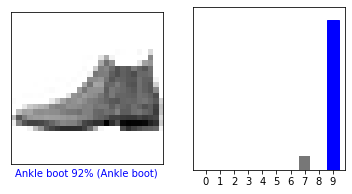

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

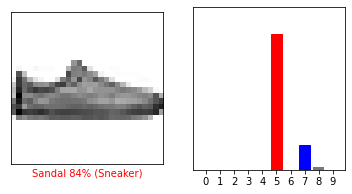

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

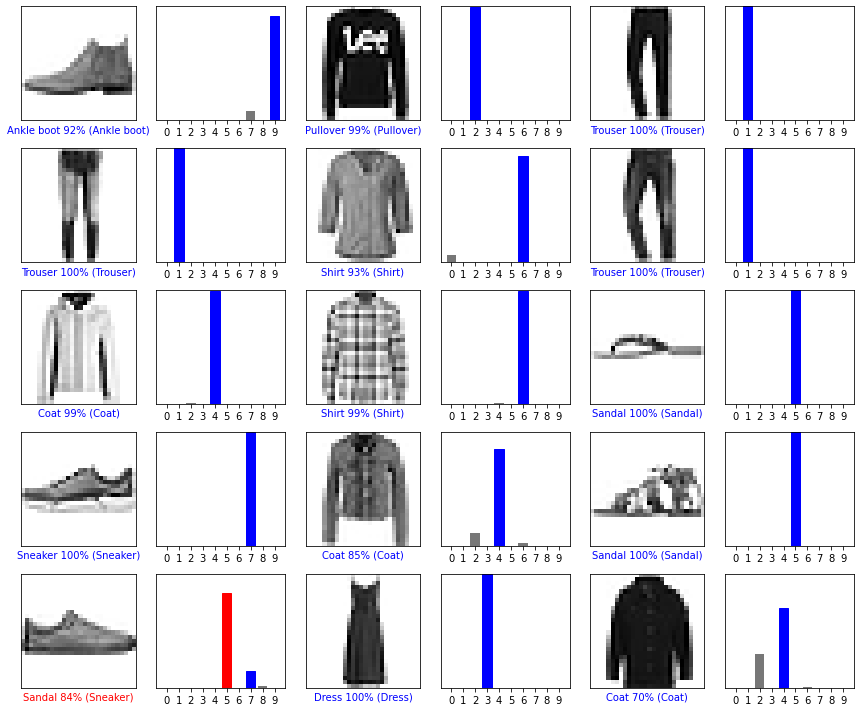

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
#make a prediction for the image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.0131420e-05 4.0494897e-13 9.9440974e-01 1.7670039e-09 3.4743610e-03
  1.4218631e-16 2.0957624e-03 1.7125485e-19 5.0873569e-11 1.0253967e-11]]


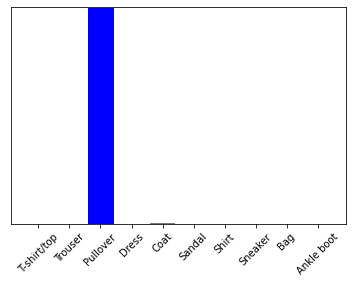

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
np.argmax(predictions_single[0])

2